In [1]:
#Usual imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#load dataset
df = pd.read_csv('Clustering_GCLmIHC_200210.csv')[:3717].T[1:12].T
df.shape #reads out imported dataset dimentionality
df.head(5000)

,Brn3a-_neg,CalR+,MEIS2+,CAVIII+,FOXP2+,Syt6+,Syt10+,Satb2+,RBPMS+,Pvalb_neg,CalB_neg
0,1,0,0,0,0,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,0,0,1
2,0,1,1,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3712,0,0,0,0,0,0,0,0,0,1,1
3713,0,0,0,0,0,1,0,0,0,0,0
3714,1,0,0,0,0,0,0,0,0,0,0
3715,1,0,0,0,0,0,0,0,0,1,1


In [3]:
#imports for clustering
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage="ward", n_clusters=30)
clustering.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=30,
                        pooling_func='deprecated')

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(df, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

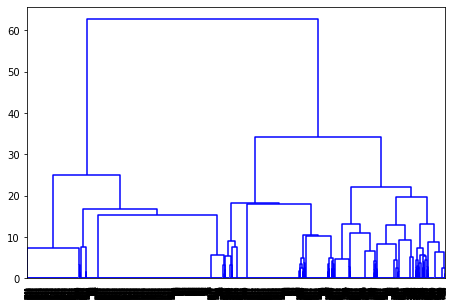

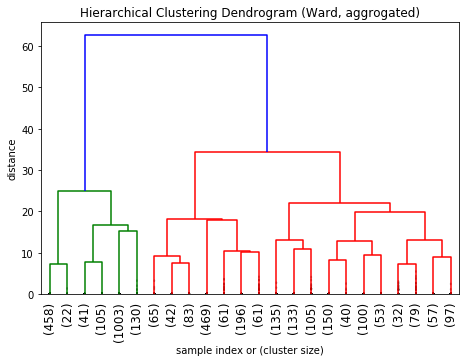

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(df, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

In [77]:
clusterAssignment = clustering.labels_
print(clusterAssignment)

[16 28 23 ...  7 16  5]


In [78]:
clusterAssignment

array([16, 28, 23, ...,  7, 16,  5], dtype=int32)

In [31]:
#np.savetxt("ClusterAssignment_GCAC_200210.csv", clusterAssignment, delimiter=",")

In [39]:
len(clusterAssignment)

3717

In [48]:
type(np.array(df.iloc[[0,1,2,3]])[0])

numpy.ndarray

In [54]:
#diff
abs(np.add(np.array(df.iloc[[0,1,2,3]])[1], -np.array(df.iloc[[0,1,2,3]])[0]))

array([-1, 0, 1, 0, 0, 0, 0, 0, 0, -1, 0], dtype=object)

In [60]:
#sim
np.logical_and(np.array(df.iloc[[0,1,2,3]])[3], np.array(df.iloc[[0,1,2,3,4]])[4])

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=object)

In [76]:
clusterlist = [[] for i in range(max(clusterAssignment) + 1)]
for i in range(len(clusterAssignment)):
    clusterlist[clusterAssignment[i]].append(i)
clusterlist

NameError: name 'clusterAssignment' is not defined

In [172]:
simdiff(1, 2)

Sims:  [3, 4, 5, 7, 8, 1, 6, 2, 0, 9, 10]
Diffs:  [10, 9, 0, 2, 6, 1, 8, 3, 4, 5, 7]


(array([1509, 7425, 2970, 8235, 8235, 8235, 7020, 8235, 7930, 1080,    0]),
 array([6726,  810, 5265,    0,    0,    0, 1215,    0,  305, 7155, 8235]))

In [171]:
def simdiff(class_a, class_b, clusterlist=clusterlist):
    class_a = np.array(df.iloc[clusterlist[class_a]])
    class_b = np.array(df.iloc[clusterlist[class_b]])
    sim = np.zeros((len(class_a[0]),), dtype=int)
    diff = np.zeros((len(class_a[0]),), dtype=int)
    for a in class_a:
        for b in class_b:
            a = np.array(a)
            b = np.array(b)
            #print(type(a))
            #print(type(b))
            x = np.array(np.logical_xor(list(a),list(b)))
            #sim
            sim = np.add(sim, ~x)
            #diff
            diff = np.add(diff, x)
    print("Sims: ", sorted(range(len(sim)), key=lambda k: -sim[k]))
    print("Diffs: ", sorted(range(len(diff)), key=lambda k: -diff[k]))
    return sim, diff

In [89]:
def simdiffindex(class_a, class_b):
    class_a = np.array(df.iloc[class_a])
    class_b = np.array(df.iloc[class_b])
    sim = np.zeros((len(class_a[0]),), dtype=int)
    diff = np.zeros((len(class_a[0]),), dtype=int)
    for a in class_a:
        for b in class_b:
            a = np.array(a)
            b = np.array(b)
            #print(type(a))
            #print(type(b))
            x = np.array(np.logical_xor(list(a),list(b)))
            #sim
            sim = np.add(sim, ~x)
            #diff
            diff = np.add(diff, x)
    #print("Sims: ", sorted(range(len(sim)), key=lambda k: -sim[k]))
    #print("Diffs: ", sorted(range(len(diff)), key=lambda k: -diff[k]))
    return sim, diff, sorted(range(len(sim)), key=lambda k: -sim[k]), sorted(range(len(diff)), key=lambda k: -diff[k])

In [144]:
np.logical_xor(np.array([0,0,1,1]), np.array([0,0,1,1]))

array([False, False, False, False])

In [158]:
np.logical_xor(list(z[0]), list(z[1]))

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [69]:
l = pd.DataFrame(linkage_matrix)
l = l.astype(int)
l

,0,1,2,3
0,0,18,0,2
1,1,69,0,2
2,2,14,0,2
3,3,6,0,2
4,4,26,0,2
...,...,...,...,...
3711,7421,7422,19,608
3712,7423,7428,22,981
3713,7411,7425,24,1759
3714,7427,7429,34,1958


In [53]:
l[l[1] == 3716.0].head(5)
len(l)

3716

In [54]:
list(l.iloc[0])

[0, 18, 0, 2]

KeyError: 3725

In [91]:
n = len(l)
i = 1
d = {z:[z] for z in range(n + 1)}
result = []
for row in [list(l.iloc[z]) for z in range(n)]:
    if (i % 400 == 0):
        print(i)
    row0 = d[row[0]]
    row1 = d[row[1]]
    sim, diff, sort_sim, sort_diff = simdiffindex(row0, row1)
    d[n + i] = row0 + row1
    result.append([row0, row1, sort_sim, sort_diff])
    #result.append([row0, row1, sim, diff, sort_sim, sort_diff])
    i += 1
r = pd.DataFrame(result)
r

400
800
1200
1600
2000
2400
2800
3200
3600


,0,1,2,3
0,[0],[18],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
1,[1],[69],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
2,[2],[14],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
3,[3],[6],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
4,[4],[26],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
...,...,...,...,...
3711,"[23, 3696, 3695, 3691, 3667, 3657, 3651, 3587,...","[1557, 2171, 2555, 1359, 863, 1048, 2214, 893,...","[3, 5, 4, 6, 1, 7, 8, 9, 2, 10, 0]","[0, 10, 2, 9, 8, 7, 1, 6, 4, 3, 5]"
3712,"[3713, 3687, 3685, 3679, 3620, 3615, 3552, 354...","[23, 3696, 3695, 3691, 3667, 3657, 3651, 3587,...","[4, 3, 6, 7, 1, 9, 8, 2, 5, 0, 10]","[10, 0, 5, 2, 8, 9, 1, 7, 6, 3, 4]"
3713,"[3707, 3706, 3705, 3703, 3702, 3700, 3690, 368...","[3683, 3681, 3648, 3641, 3602, 3568, 3567, 342...","[0, 5, 6, 7, 9, 10, 8, 4, 3, 1, 2]","[2, 1, 3, 4, 8, 10, 9, 0, 5, 6, 7]"
3714,"[3550, 3522, 3509, 3474, 3405, 3404, 3254, 322...","[3713, 3687, 3685, 3679, 3620, 3615, 3552, 354...","[3, 4, 7, 1, 6, 8, 5, 2, 10, 0, 9]","[9, 0, 10, 2, 5, 8, 6, 1, 7, 4, 3]"


In [124]:
def find(a, b):
    z = [i for i in range(n) if ((a in r.iloc[i][0] and b in r.iloc[i][1]) or (a in r.iloc[i][1] and b in r.iloc[i][0]))]
    assert(len(z) == 1)
    return r.iloc[z[0]][2]

In [125]:
find(54, 610)

[3, 4, 7, 1, 6, 8, 5, 2, 10, 0, 9]

In [113]:
[i for i in range(n) if (23 in r.iloc[i][0] and 1557 in r.iloc[i][1])]

[3711]

In [106]:
r[0 in r[0]]

0                                                    [18]
1                                                    [69]
2                                                    [14]
3                                                     [6]
4                                                    [26]
                              ...                        
3711    [1557, 2171, 2555, 1359, 863, 1048, 2214, 893,...
3712    [23, 3696, 3695, 3691, 3667, 3657, 3651, 3587,...
3713    [3683, 3681, 3648, 3641, 3602, 3568, 3567, 342...
3714    [3713, 3687, 3685, 3679, 3620, 3615, 3552, 354...
3715    [3550, 3522, 3509, 3474, 3405, 3404, 3254, 322...
Name: 1, Length: 3716, dtype: object

In [88]:
r.iloc[3714][3]

array([568121,  42268, 413147,   6827,  10711, 196641,  75959,  32241,
       158274, 830493, 513431])

In [ ]:
# A (n-1) by 4 matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index less than n corresponds to one of the original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.